In [3]:
from __future__ import division, print_function
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import MaxPooling1D, Dense, Dropout,Flatten, Activation, Embedding, Conv1D, GlobalMaxPooling1D, BatchNormalization
from tensorflow.python.keras.datasets import imdb
os.environ["CUDA_VISIBLE_DEVICES"] = "" 
data = np.load('../fac_cond256_unit8.npz')
raw_X=data['cond']
# raw_X=np.squeeze(data['cond'],-1)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
BATCH_SIZE = 128   
NUM_EPOCHS = 5000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain[0].shape)

(2000, 65, 1) (1000, 65, 1) (2000, 3) (1000, 3)
(65, 1)


In [4]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3,padding='same', input_shape=( 65,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3,padding='same',  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3))
model.add(Activation('tanh'))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 65, 32)            128       
_________________________________________________________________
batch_normalization_7 (Batch (None, 65, 32)            128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 32, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 32, 64)            6208      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 64)            256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 16, 128)          

In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)

Train on 2000 samples, validate on 1000 samples
Epoch 1/5000
2000/2000 [==============================] - ETA: 0s - loss: 3.5916 - mean_squared_error: 3.5916

/home/chase/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2000/2000 [==============================] - 8s 4ms/sample - loss: 3.5916 - mean_squared_error: 3.5916 - val_loss: 1.8096 - val_mean_squared_error: 1.8096
Epoch 2/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 2.8588 - mean_squared_error: 2.8588 - val_loss: 1.7947 - val_mean_squared_error: 1.7947
Epoch 3/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 2.4571 - mean_squared_error: 2.4571 - val_loss: 1.7901 - val_mean_squared_error: 1.7901
Epoch 4/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 2.2010 - mean_squared_error: 2.2010 - val_loss: 1.7941 - val_mean_squared_error: 1.7941
Epoch 5/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 2.1132 - mean_squared_error: 2.1132 - val_loss: 1.7939 - val_mean_squared_error: 1.7939
Epoch 6/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 2.0786 - mean_squared_error: 2.0786 - val_loss: 1.7945 - val_mean_squared_error: 1.

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7801 - mean_squared_error: 1.7801 - val_loss: 1.7846 - val_mean_squared_error: 1.7846
Epoch 50/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7801 - mean_squared_error: 1.7801 - val_loss: 1.7846 - val_mean_squared_error: 1.7846
Epoch 51/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7801 - mean_squared_error: 1.7801 - val_loss: 1.7844 - val_mean_squared_error: 1.7844
Epoch 52/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7798 - mean_squared_error: 1.7798 - val_loss: 1.7838 - val_mean_squared_error: 1.7838
Epoch 53/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7797 - mean_squared_error: 1.7797 - val_loss: 1.7844 - val_mean_squared_error: 1.7844
Epoch 54/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7798 - mean_squared_error: 1.7798 - val_loss: 1.7843 - val_mean_squared_er

Epoch 97/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7795 - mean_squared_error: 1.7795 - val_loss: 1.7839 - val_mean_squared_error: 1.7839
Epoch 98/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7793 - mean_squared_error: 1.7793 - val_loss: 1.7851 - val_mean_squared_error: 1.7851
Epoch 99/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7795 - mean_squared_error: 1.7795 - val_loss: 1.7844 - val_mean_squared_error: 1.7844
Epoch 100/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7802 - mean_squared_error: 1.7802 - val_loss: 1.7843 - val_mean_squared_error: 1.7843
Epoch 101/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7818 - mean_squared_error: 1.7818 - val_loss: 1.7849 - val_mean_squared_error: 1.7849
Epoch 102/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7822 - mean_squared_error: 1.7822 - val_loss: 1.7846 - va

Epoch 145/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7806 - mean_squared_error: 1.7806 - val_loss: 1.7848 - val_mean_squared_error: 1.7848
Epoch 146/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7798 - mean_squared_error: 1.7798 - val_loss: 1.7841 - val_mean_squared_error: 1.7841
Epoch 147/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7801 - mean_squared_error: 1.7801 - val_loss: 1.7846 - val_mean_squared_error: 1.7846
Epoch 148/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7799 - mean_squared_error: 1.7799 - val_loss: 1.7848 - val_mean_squared_error: 1.7848
Epoch 149/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7799 - mean_squared_error: 1.7799 - val_loss: 1.7847 - val_mean_squared_error: 1.7847
Epoch 150/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7806 - mean_squared_error: 1.7806 - val_loss: 1.7915 -

Epoch 240/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7818 - mean_squared_error: 1.7818 - val_loss: 1.7853 - val_mean_squared_error: 1.7853
Epoch 241/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7803 - mean_squared_error: 1.7803 - val_loss: 1.7842 - val_mean_squared_error: 1.7842
Epoch 242/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7794 - mean_squared_error: 1.7794 - val_loss: 1.7838 - val_mean_squared_error: 1.7838
Epoch 243/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7793 - mean_squared_error: 1.7793 - val_loss: 1.7836 - val_mean_squared_error: 1.7836
Epoch 244/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7802 - mean_squared_error: 1.7802 - val_loss: 1.7836 - val_mean_squared_error: 1.7836
Epoch 245/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7803 - mean_squared_error: 1.7803 - val_loss: 1.7953 -

Epoch 335/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7847 - mean_squared_error: 1.7847 - val_loss: 1.7930 - val_mean_squared_error: 1.7930
Epoch 336/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7829 - mean_squared_error: 1.7829 - val_loss: 1.7863 - val_mean_squared_error: 1.7863
Epoch 337/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7822 - mean_squared_error: 1.7822 - val_loss: 1.7877 - val_mean_squared_error: 1.7877
Epoch 338/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7821 - mean_squared_error: 1.7821 - val_loss: 1.7844 - val_mean_squared_error: 1.7844
Epoch 339/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7823 - mean_squared_error: 1.7823 - val_loss: 1.7879 - val_mean_squared_error: 1.7879
Epoch 340/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7814 - mean_squared_error: 1.7814 - val_loss: 1.7849 -

Epoch 430/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 431/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 432/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 433/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 434/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 435/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 -

Epoch 525/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7803 - mean_squared_error: 1.7803 - val_loss: 1.7837 - val_mean_squared_error: 1.7837
Epoch 526/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7814 - mean_squared_error: 1.7814 - val_loss: 1.8184 - val_mean_squared_error: 1.8184
Epoch 527/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7819 - mean_squared_error: 1.7819 - val_loss: 1.8172 - val_mean_squared_error: 1.8172
Epoch 528/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7817 - mean_squared_error: 1.7817 - val_loss: 1.7937 - val_mean_squared_error: 1.7937
Epoch 529/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7813 - mean_squared_error: 1.7813 - val_loss: 1.8068 - val_mean_squared_error: 1.8068
Epoch 530/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7809 - mean_squared_error: 1.7809 - val_loss: 1.7929 -

Epoch 620/5000
2000/2000 [==============================] - 0s 156us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 621/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7834 - val_mean_squared_error: 1.7834
Epoch 622/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 623/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7834 - val_mean_squared_error: 1.7834
Epoch 624/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 625/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7833 -

Epoch 715/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 716/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 717/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 718/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 719/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 720/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 -

Epoch 810/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 811/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 812/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 813/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 814/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 815/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 -

Epoch 905/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 906/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 907/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 908/5000
2000/2000 [==============================] - 0s 157us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 909/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 910/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 -

Epoch 1000/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7783 - mean_squared_error: 1.7783 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1001/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1002/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1003/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1004/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1005/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7834 - val_mean_squared_error: 1.7834
Epoch 1095/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1096/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1097/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7847 - val_mean_squared_error: 1.7847
Epoch 1098/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1099/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1189/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1190/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1191/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1192/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1193/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7834 - val_mean_squared_error: 1.7834
Epoch 1283/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1284/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1285/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1286/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1287/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1377/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1378/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1379/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1380/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1381/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.9705 - val_mean_

2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1471/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1472/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1473/5000
2000/2000 [==============================] - 0s 162us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1474/5000
2000/2000 [==============================] - 0s 149us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1475/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1565/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1566/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1567/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1568/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1569/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1659/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1660/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1661/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1662/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1663/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1753/5000
2000/2000 [==============================] - 0s 156us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1754/5000
2000/2000 [==============================] - 0s 156us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1755/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1756/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1757/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1847/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7833 - val_mean_squared_error: 1.7833
Epoch 1848/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1849/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1850/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1851/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1941/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1942/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1943/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1944/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 1945/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2035/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2036/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2037/5000
2000/2000 [==============================] - 0s 160us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2038/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2039/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2129/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2130/5000
2000/2000 [==============================] - 0s 156us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2131/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 2.1219 - val_mean_squared_error: 2.1219
Epoch 2132/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7836 - val_mean_squared_error: 1.7836
Epoch 2133/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7836 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2223/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2224/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2225/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2226/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2227/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2317/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2318/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2319/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2320/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2321/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2411/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2412/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2413/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2414/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2415/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2505/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2506/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2507/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2508/5000
2000/2000 [==============================] - 0s 158us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2509/5000
2000/2000 [==============================] - 0s 157us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2599/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2600/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2601/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2602/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2603/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2693/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2694/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2695/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2696/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2697/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2787/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2788/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2789/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2790/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2791/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2881/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2882/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2883/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2884/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2885/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2975/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2976/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2977/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2978/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 2979/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3069/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3070/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3071/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3072/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3073/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3163/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3164/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3165/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3166/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3167/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3257/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3258/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3259/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3260/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3261/5000
2000/2000 [==============================] - 0s 161us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3351/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3352/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3353/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3354/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3355/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3445/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3446/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3447/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3448/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3449/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3539/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3540/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3541/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3542/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3543/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3633/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3634/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3635/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3636/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3637/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3727/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3728/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3729/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3730/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3731/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3821/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3822/5000
2000/2000 [==============================] - 0s 156us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3823/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3824/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3825/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3915/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3916/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3917/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3918/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 3919/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4009/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4010/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4011/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4012/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4013/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4103/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4104/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4105/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4106/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4107/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4197/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4198/5000
2000/2000 [==============================] - 0s 156us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4199/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4200/5000
2000/2000 [==============================] - 0s 156us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4201/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4291/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4292/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4293/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4294/5000
2000/2000 [==============================] - 0s 156us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4295/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4385/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4386/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4387/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4388/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4389/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4479/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4480/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4481/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4482/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4483/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4573/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4574/5000
2000/2000 [==============================] - 0s 161us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4575/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4576/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4577/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4667/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4668/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4669/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4670/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4671/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4761/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4762/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4763/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4764/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4765/5000
2000/2000 [==============================] - 0s 150us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4855/5000
2000/2000 [==============================] - 0s 152us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4856/5000
2000/2000 [==============================] - 0s 149us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4857/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4858/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4859/5000
2000/2000 [==============================] - 0s 151us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4949/5000
2000/2000 [==============================] - 0s 155us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4950/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4951/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4952/5000
2000/2000 [==============================] - 0s 153us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 4953/5000
2000/2000 [==============================] - 0s 154us/sample - loss: 1.7782 - mean_squared_error: 1.7782 - val_loss: 1.7832 - val_mean_

In [6]:
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 
pre = model.predict(Xtest, batch_size=BATCH_SIZE)


MSE: 1.783, RMSE: 1.335


In [7]:
ae=np.maximum(pre-Ytest,Ytest-pre)
mae0=np.mean(ae[0])
mae1=np.mean(ae[1])
mae2=np.mean(ae[2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))


MAE0: 0.278, MAE1: 0.453, MAE2: 0.629,

MSE0: 0.527, MSE1: 0.673, MSE2: 0.793,


In [8]:
print(pre.shape,Ytest.shape)

(1000, 3) (1000, 3)


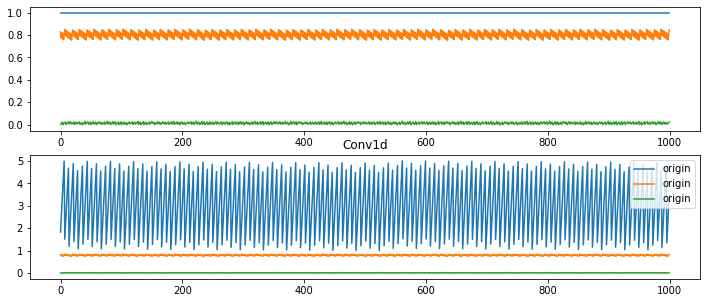

In [14]:

plt.figure(figsize=(12,5))

fig1,ax1=plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.title('Conv1d')
plt.legend()
plt.show()

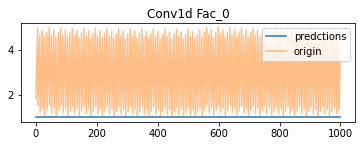

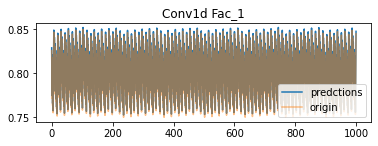

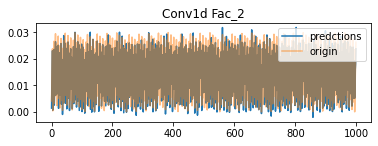

In [18]:
plt.figure(1)
plt.subplot(211)
plt.title('Conv1d Fac_0')
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.title('Conv1d Fac_1')
plt.plot(pre[:,1],label='predctions',alpha=1)
plt.plot(Ytest[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.title('Conv1d Fac_2')
plt.plot(pre[:,2],label='predctions',alpha=1)
plt.plot(Ytest[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()

# plt.figure(1)
plt.title('fac_0')
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=0.5)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions',alpha=0.5)
plt.plot(Ytest[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions',alpha=0.5)
plt.plot(Ytest[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()